In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('data/dataset_reduced.csv')
data_encoded = pd.get_dummies(data)


data_encoded['target_class'] = pd.qcut(data_encoded['Cs'], q=10, labels=False)
X = data_encoded.drop(['Cs', 'target_class'], axis=1)
y = data_encoded['Cs']
stratify_column = data_encoded['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=21, stratify=stratify_column)

X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

X_train, X_test, y_train, y_test

(         O     N      SSA     PV       Mic       Dap  ID/IG  AML     CD
 484  15.55  2.61  3139.20  1.740  0.557471  2.217125  1.020  1.0    5.0
 145   7.71  0.00   804.00  0.315  0.621891  1.567164  0.970  1.2    4.0
 491  15.55  2.61  3139.20  1.740  0.557471  2.217125  1.020  1.0  100.0
 463   8.35  2.41  2511.00  2.170  0.437788  3.456790  2.070  1.5   10.0
 216   4.89  1.74  1666.80  2.420  0.119835  5.807535  0.880  2.5    5.0
 ..     ...   ...      ...    ...       ...       ...    ...  ...    ...
 460   8.35  2.41  2511.00  2.170  0.437788  3.456790  2.070  1.5    1.0
 224   6.42  2.75  1301.60  3.040  0.069079  9.342348  0.920  2.5    0.5
 375   3.37  0.00  3252.60  3.428  0.099475  4.215704  1.020  1.0   10.0
 340   6.75  2.16  2363.18  1.330  0.398496  2.251204  0.790  1.0    1.0
 124   9.64  3.44  1624.00  0.918  0.652505  2.261084  0.999  2.0    2.0
 
 [505 rows x 9 columns],
          O     N      SSA     PV       Mic       Dap  ID/IG  AML    CD
 612  14.26  1.82  3166.0

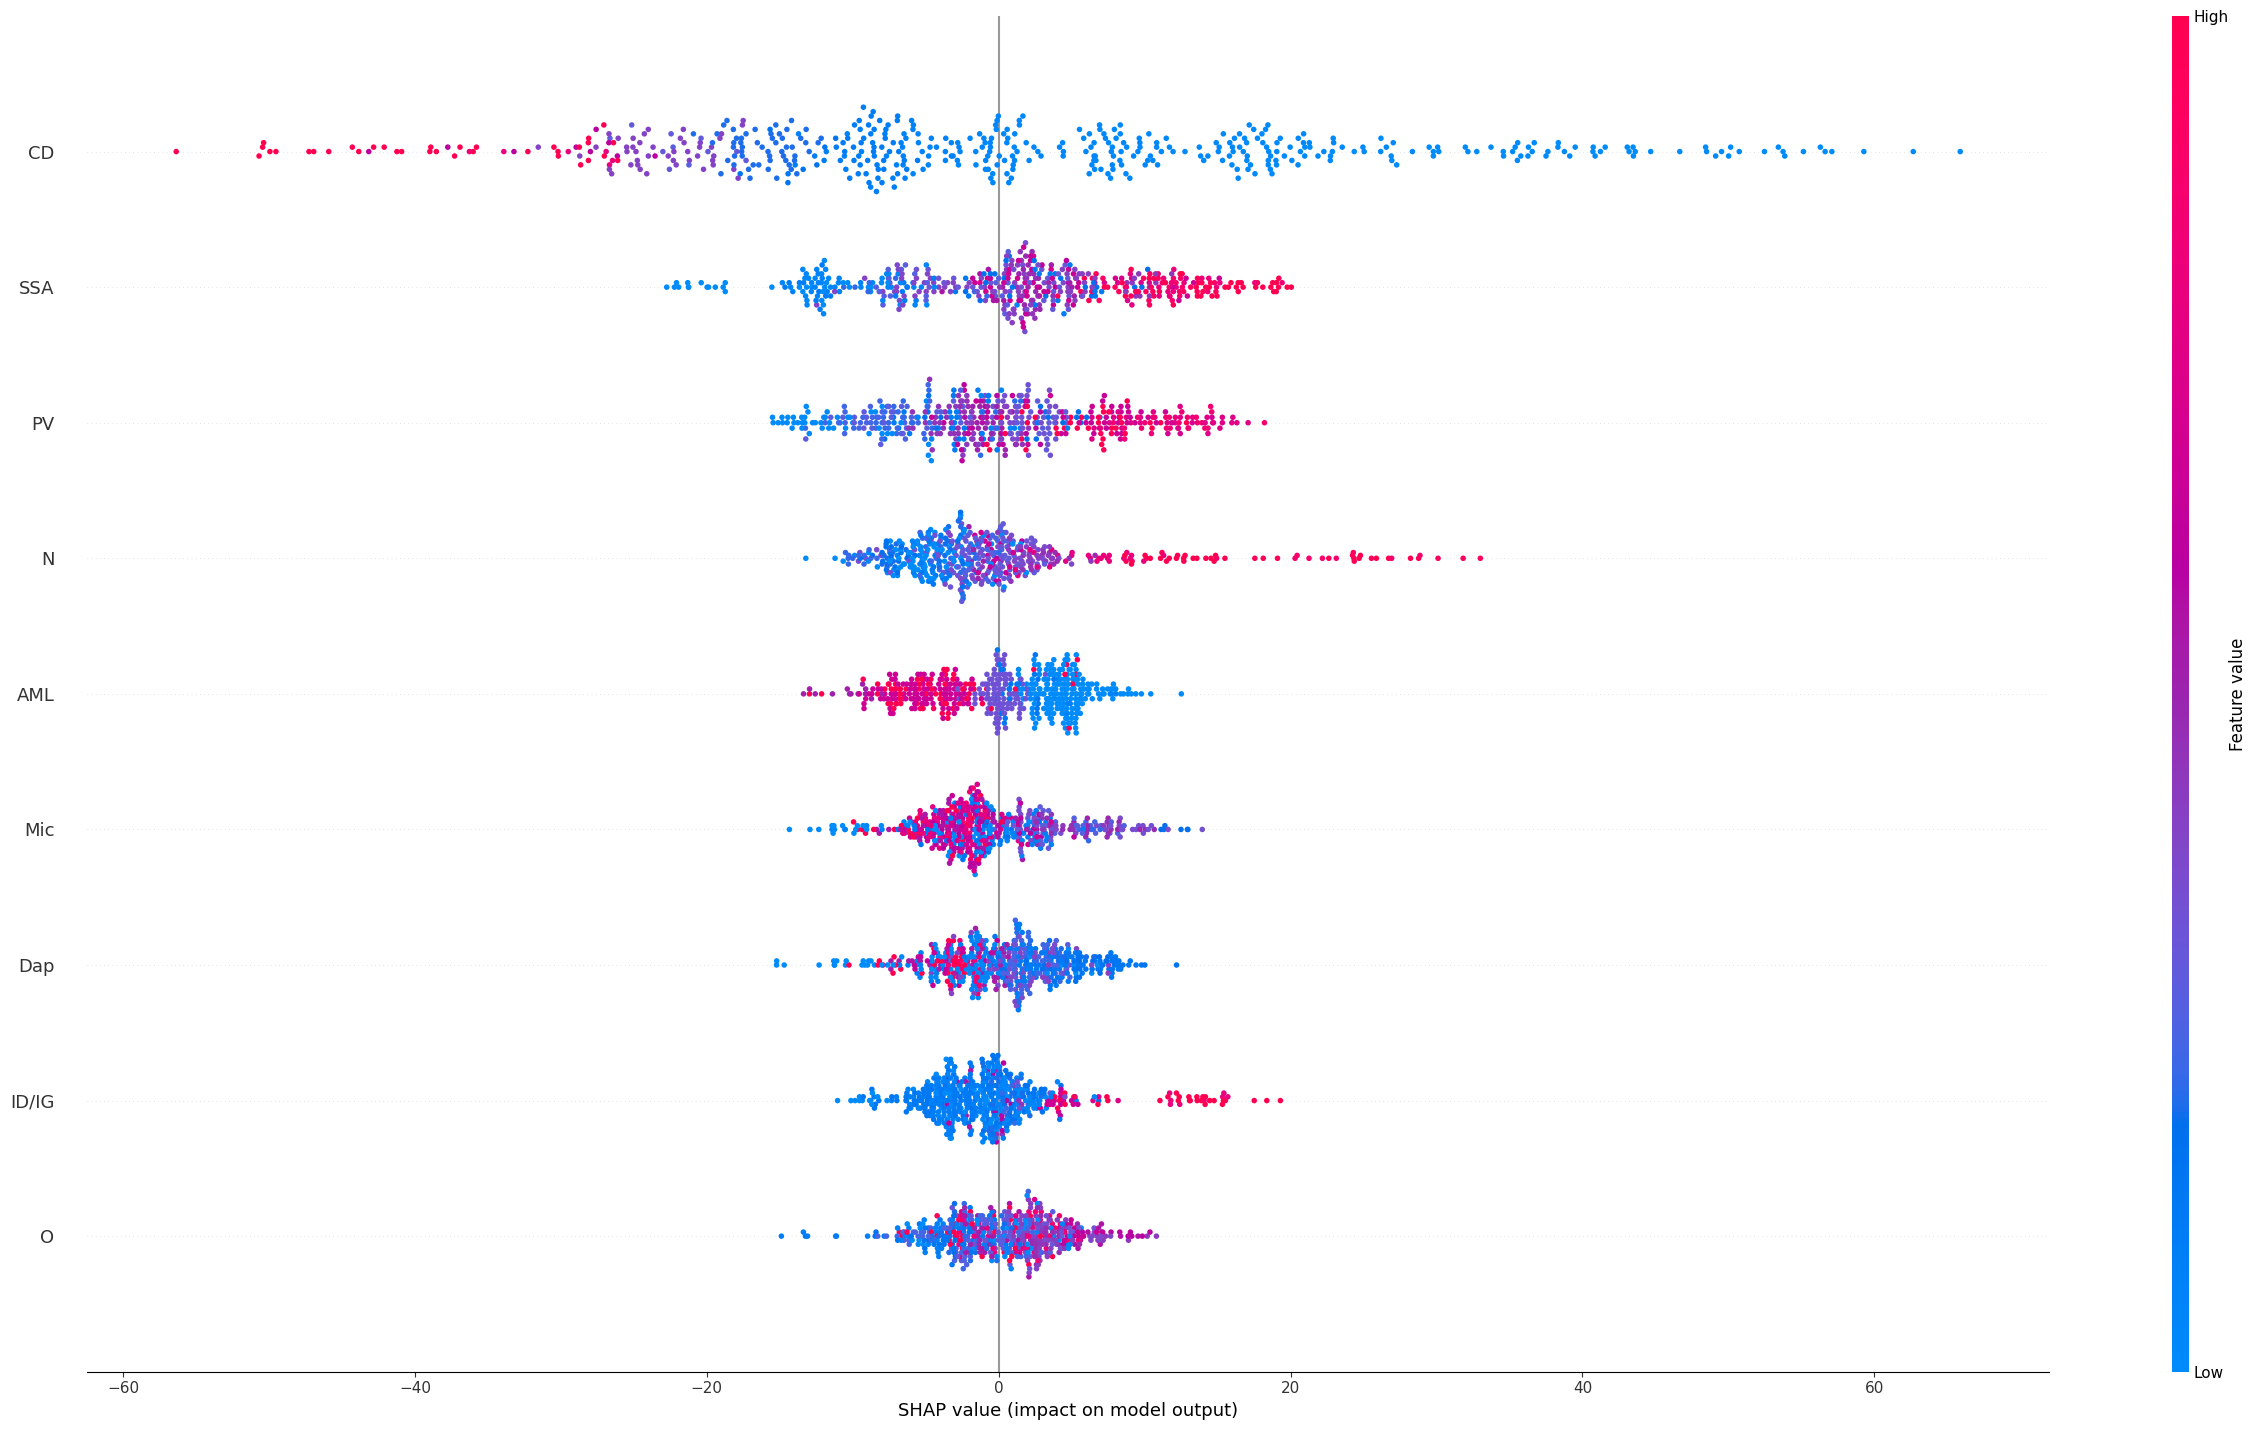

In [2]:
from xgboost import XGBRegressor
import shap
import matplotlib.pyplot as plt

xgb = XGBRegressor(n_estimators=100,
                   learning_rate=0.15,
                   subsample=0.5,
                   gamma=0.1,
                   max_depth=8,
                   min_child_weight=2,
                   reg_alpha=0.35,
                   colsample_bytree=0.7,
                   colsample_bylevel=1.0,
                   colsample_bynode=0.7,
                   random_state=21)
xgb.fit(X_train, y_train)

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

explainer = shap.Explainer(xgb)
shap_values = explainer(X_train)

shap.summary_plot(shap_values, X_train, plot_type="bar", plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_trainset_reduced_summary_bar.png')

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_train, plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_trainset_reduced_summary.png')

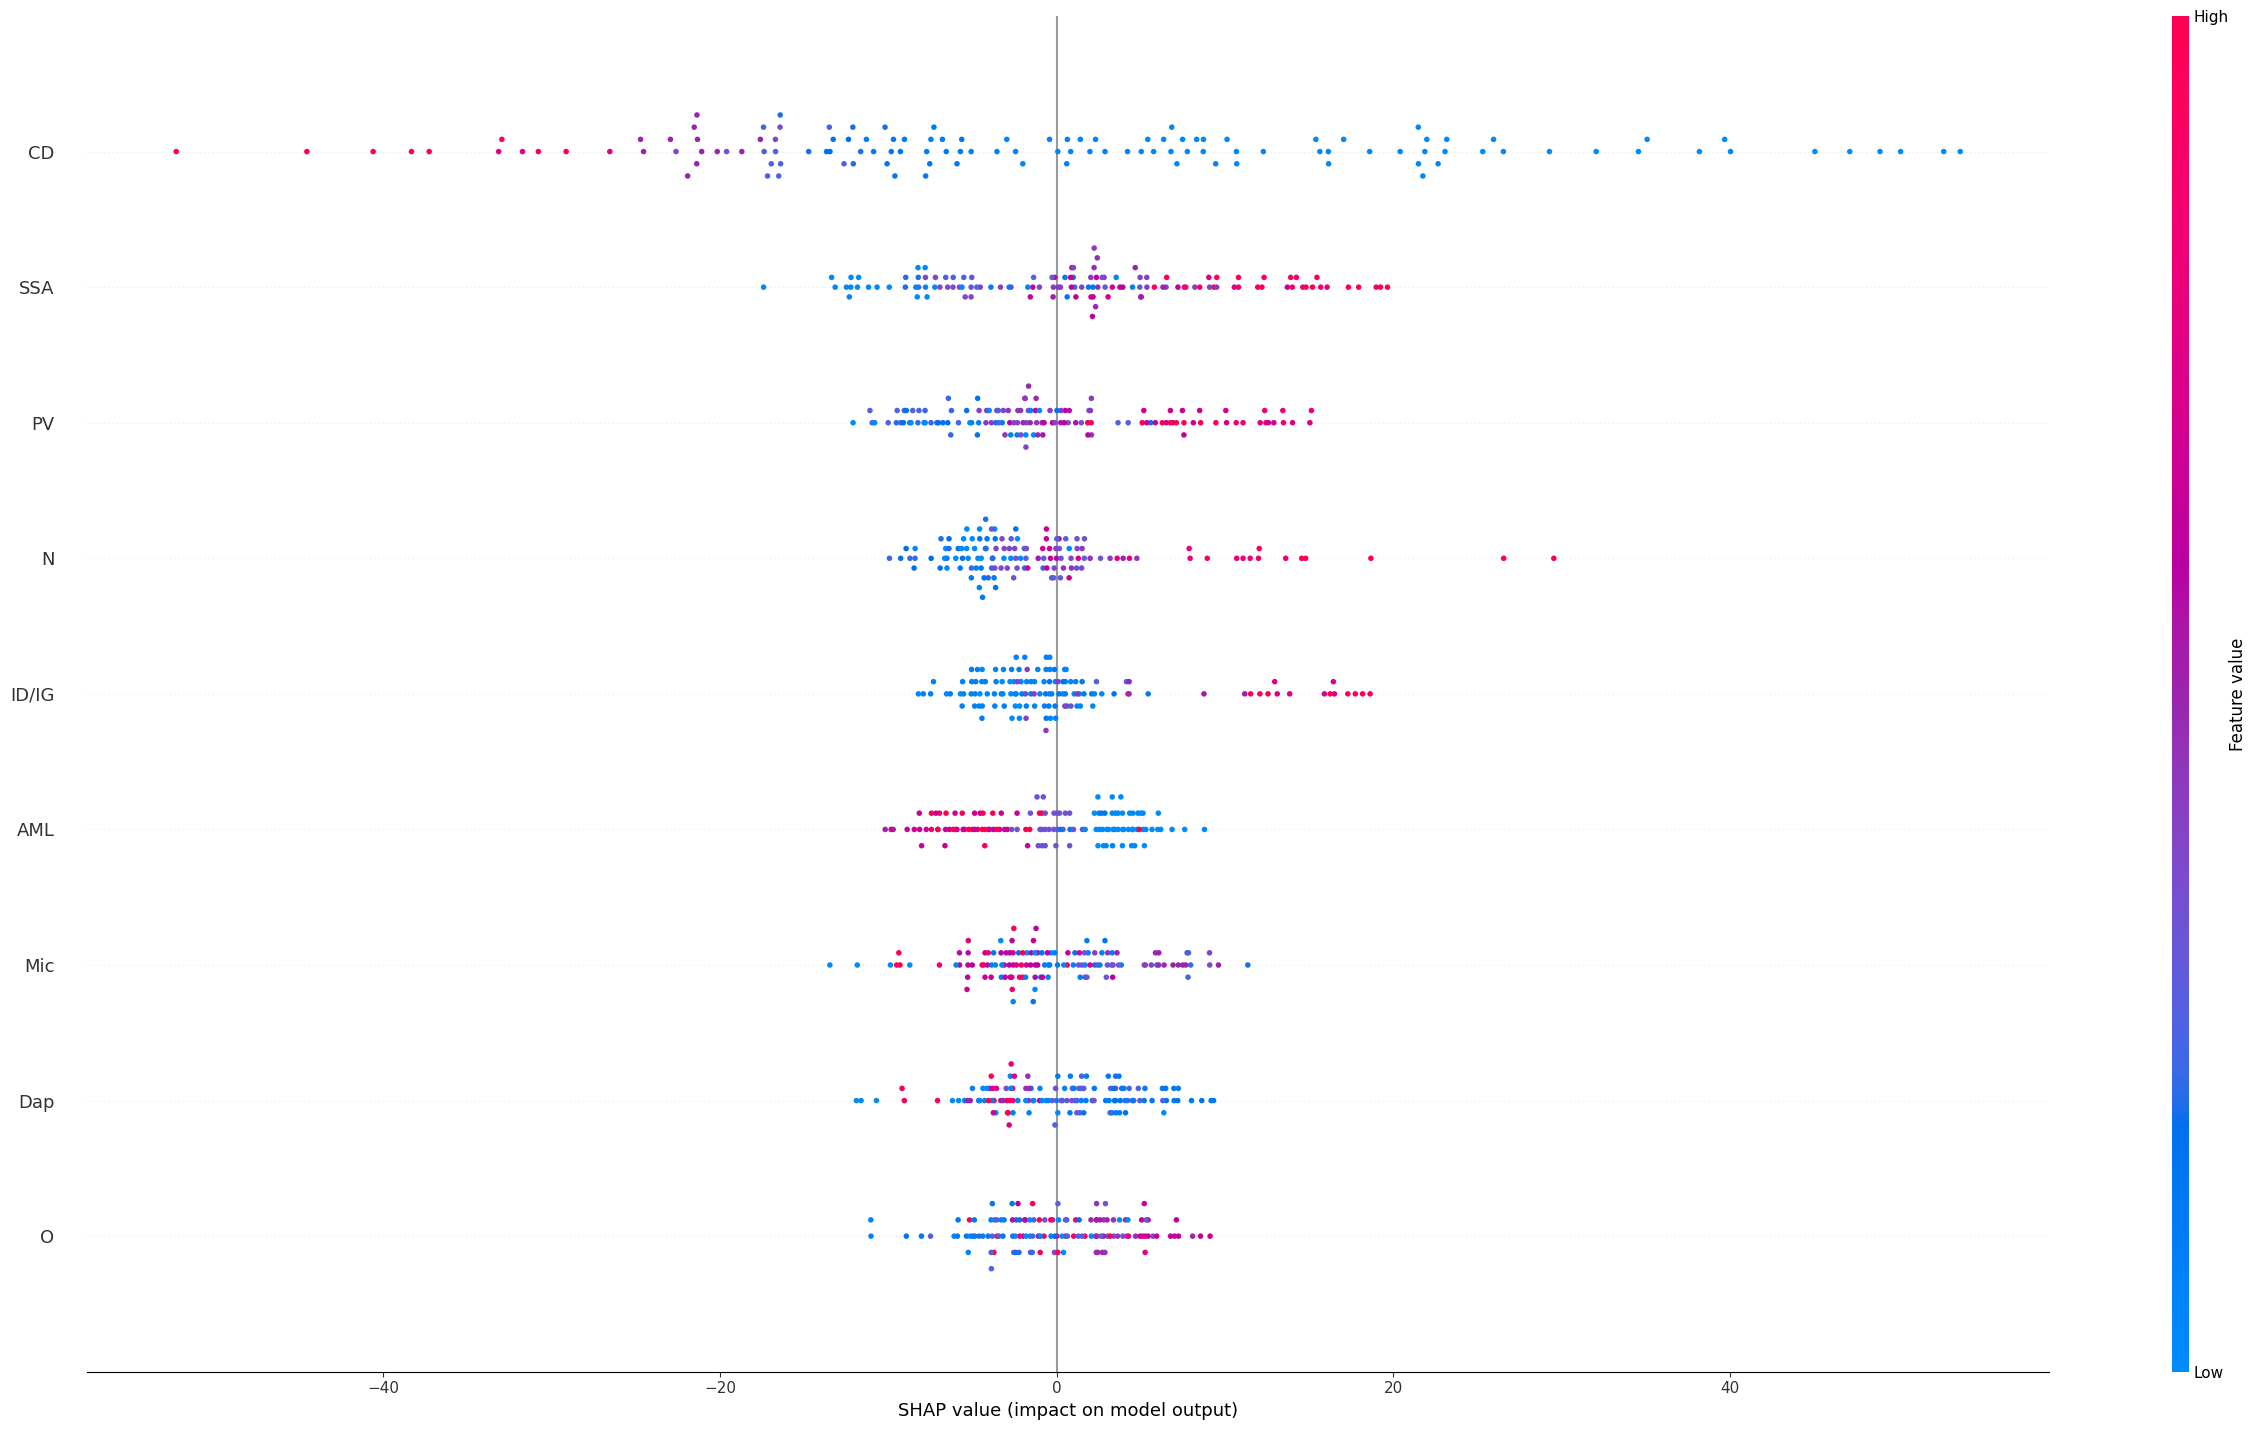

In [3]:
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar", plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_testset_reduced_summary_bar.png')

# 清除当前图形
plt.clf()

shap.summary_plot(shap_values, X_test, plot_size=(25.6, 14.4), show=False)
plt.savefig('output/figures/shap_testset_reduced_summary.png')